In [48]:
###  データのロード

import numpy as np
import os

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')


Pressurelist = np.load(os.path.join(input_dir,'Pressurelist.npy'), allow_pickle=True).item()
Epsilonlist = np.load(os.path.join(input_dir,'Epsilonlist.npy'), allow_pickle=True).item()
IBT_deltaPt = np.load(os.path.join(input_dir,'IBT_deltaPt.npy'), allow_pickle=True).item()
STORM_deltaPt = np.load(os.path.join(input_dir,'STORM_deltaPt.npy'), allow_pickle=True).item()

# WPのデータを抽出
WP_IDX = 5

Pressurelist = Pressurelist[WP_IDX]
Epsilonlist = Epsilonlist[WP_IDX]
IBT_deltaPt = IBT_deltaPt[WP_IDX]
STORM_deltaPt = STORM_deltaPt[WP_IDX]

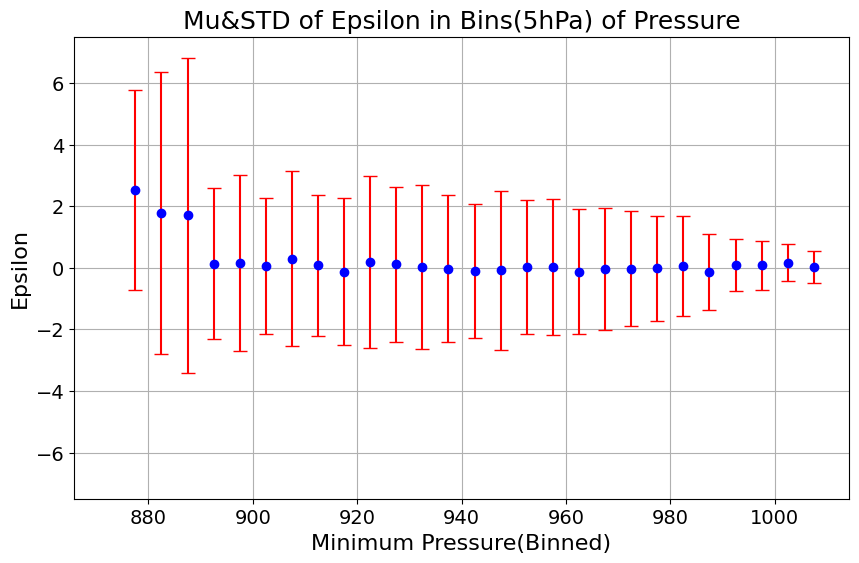

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'Epsilon': Epsilonlist})

bin_step = 5

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data = data.groupby('bin')['Epsilon'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data['bin_mid'] = grouped_data.index.map(lambda x: (x.left + x.right) / 2)

# エラーバー付きでプロット (平均値 ± 標準偏差)
x = grouped_data['bin_mid']
y = grouped_data['mean']
error = grouped_data['std']

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=error, fmt='o', ecolor='red', color='blue', capsize=5)
plt.title('Mu&STD of Epsilon in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('Epsilon', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-7.5, 7.5)
plt.grid(True)
plt.show()

[ 870.  880.  890.  900.  910.  920.  930.  940.  950.  960.  970.  980.
  990. 1000. 1010.]


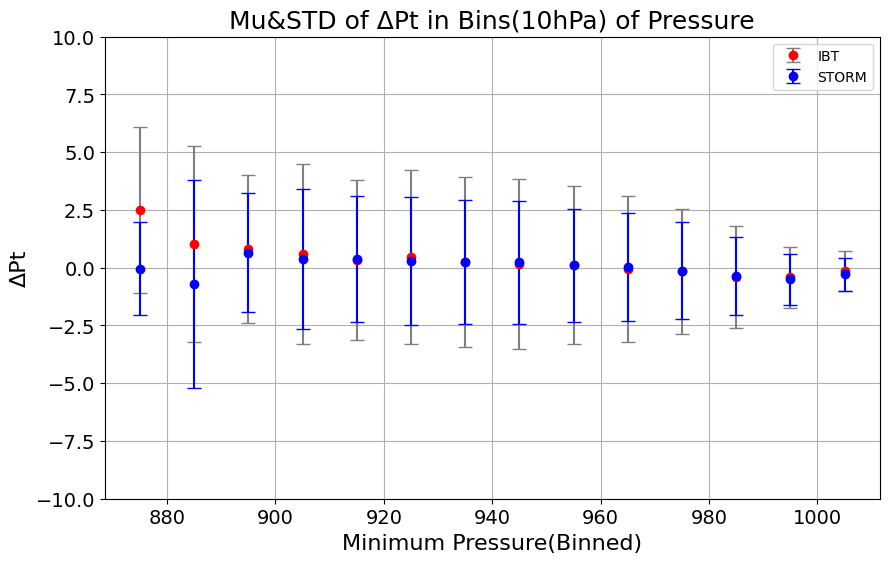

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'IBT_deltaPt': IBT_deltaPt, 'STORM_deltaPt': STORM_deltaPt})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
print(bins)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data_ibt = data.groupby('bin')['IBT_deltaPt'].agg(['mean', 'std'])
grouped_data_st = data.groupby('bin')['STORM_deltaPt'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data_ibt['bin_mid_ibt'] = grouped_data_ibt.index.map(lambda x: (x.left + x.right)/2)
grouped_data_st['bin_mid_st'] = grouped_data_st.index.map(lambda x: (x.left + x.right)/2)


# エラーバー付きでプロット (平均値 ± 標準偏差)
x_ibt = grouped_data_ibt['bin_mid_ibt']
x_st = grouped_data_st['bin_mid_st']
y_ibt = grouped_data_ibt['mean']
y_st = grouped_data_st['mean']
error_ibt = grouped_data_ibt['std']
error_st = grouped_data_st['std']

plt.figure(figsize=(10, 6))
plt.errorbar(x_ibt, y_ibt, yerr=error_ibt, fmt='o', ecolor='gray', color='red', capsize=5, label="IBT")
plt.errorbar(x_st, y_st, yerr=error_st, fmt='o', ecolor='blue', color='blue', capsize=5, label="STORM")
plt.title('Mu&STD of ΔPt in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('ΔPt', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

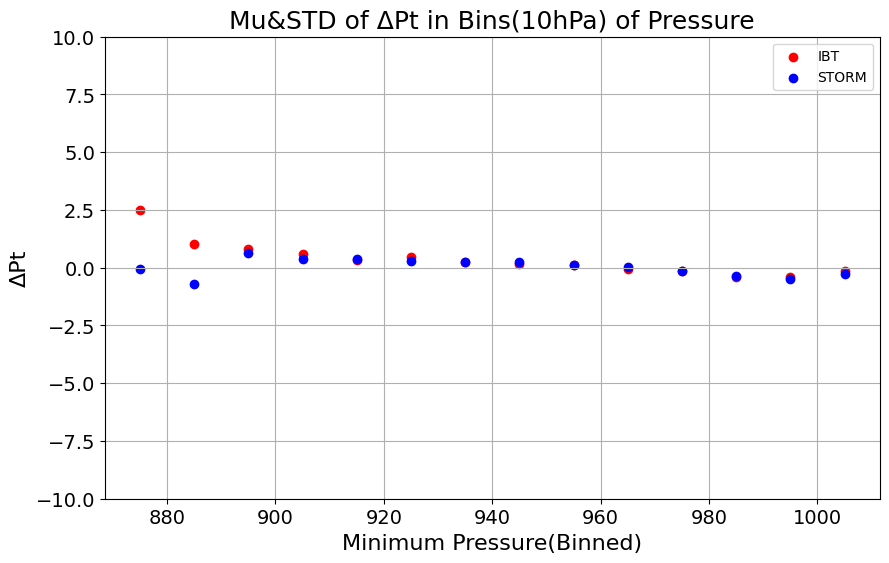

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'IBT_deltaPt': IBT_deltaPt, 'STORM_deltaPt': STORM_deltaPt})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data_ibt = data.groupby('bin')['IBT_deltaPt'].agg(['mean', 'std'])
grouped_data_st = data.groupby('bin')['STORM_deltaPt'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data_ibt['bin_mid_ibt'] = grouped_data_ibt.index.map(lambda x: (x.left + x.right)/2)
grouped_data_st['bin_mid_st'] = grouped_data_st.index.map(lambda x: (x.left + x.right)/2)


# エラーバー付きでプロット (平均値 ± 標準偏差)
x_ibt = grouped_data_ibt['bin_mid_ibt']
x_st = grouped_data_st['bin_mid_st']
y_ibt = grouped_data_ibt['mean']
y_st = grouped_data_st['mean']
error_ibt = grouped_data_ibt['std']
error_st = grouped_data_st['std']

plt.figure(figsize=(10, 6))
plt.scatter(x_ibt, y_ibt, color='red',label="IBT")
plt.scatter(x_st, y_st, color='blue',label="STORM")
plt.title('Mu&STD of ΔPt in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('ΔPt', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()